In [18]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print(tf.__version__)

2.11.0


In [19]:
mnist = tf.keras.datasets.fashion_mnist

In [20]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

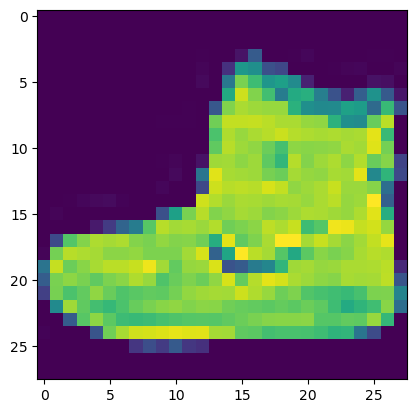

In [21]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [22]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [23]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.80):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.4961 - accuracy: 0.8258
Reached 95% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4958 - accuracy: 0.8260


In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 968us/step - loss: 0.4156 - accuracy: 0.8531


[0.41558289527893066, 0.8531000018119812]

In [28]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 0s 805us/step
[1.4359471e-04 3.7205123e-06 7.7080775e-05 5.5816286e-05 7.3425610e-05
 1.3754874e-01 6.4396765e-05 1.7072585e-01 3.0337153e-03 6.8827361e-01]
